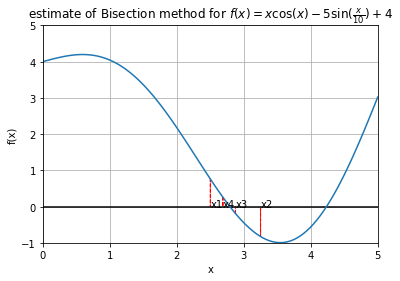

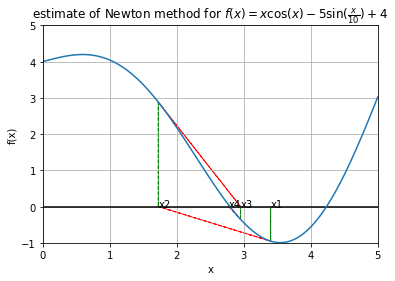

In [2]:
from math import *
from numpy import *
import pylab

def f( x ) :

    return x*cos(x) - 5*sin(x/10) + 4

#微分
def df( x , h = 1.e-7 ) :

    return ( f(x+h)-f(x-h) )/(2*h)

def plot_fn( a , b , npts ) :

    xs = linspace( a , b , npts )
    ys = f( xs )
    pylab.figure( facecolor='white' )
    pylab.grid()
    pylab.xlabel("x")
    pylab.ylabel("f(x)")
    pylab.axis(( 0 , 5 , -1 , 5 ))
    pylab.plot( xs , ys*0 , color = "k" )
    pylab.plot( xs , ys )  
    
class Root :
	
    def __init__( self , *foo , err = 1.e-10 ) :

        self.err = err

        # x = 畫的範圍 , n = 起始東西 , t = 我要做幾次
        self.x , self.n , self.t = foo[0:2] , foo[2:-1] , foo[-1:]

    def show( self ) :

        plot_fn( self.x[0] , self.x[-1] , 100 )

        self.find_root( self.t[-1] , self.n )
        
        pylab.show()

class Bisection(Root) :

    @classmethod
    def plot_estimate( cls , x0 , x1 , n0 , nn , t ) :
        
        return cls( x0 , x1 , n0 , nn , t ).show()

    # 二分求根法：在 [a,b] 區間內求根
    def find_root( self , t , *a ) :

        pylab.title("estimate of Bisection method for {}".format( r"$f(x) = x\cos(x) - 5\sin( \frac{x}{10} ) + 4$" ))

        a , b = a[0][0] , a[0][1]

        fa , fb = f(a) , f(b) 

        for i in range( t ) :
            
            c = ( a + b ) / 2

            pylab.text( c , 0 , "x{}".format( i + 1 ) )

            pylab.arrow( c , 0 , 0 , f(c) , color = "r" , ls = "--" )

            if abs( f(c) ) < self.err :

                break 

            if fa * f(c) < 0 :
                
                b = c

            elif fb * f(c) < 0 :

                a = c
            
class Newton(Root) :

    @classmethod
    def plot_estimate( cls , x0 , x1 , n0 , t ) :

        return cls( x0 , x1 , n0 , t ).show()

    #  牛頓求根：由點 x1 起始
    def find_root( self , t , n ) :

        pylab.title("estimate of Newton method for {}".format( r"$f(x) = x\cos(x) - 5\sin( \frac{x}{10} ) + 4$" ) )

        x1 = n[0]

        pylab.text( x1 , 0 , "x{}".format( 1 ) )

        pylab.arrow( x1 , 0 , 0 , f(x1) , color = "g" , ls = "--" )

        for i in range( t ) :

            x2 = x1 - f(x1)/df(x1)

            pylab.arrow( x1 , f(x1) , x2 - x1  , - f(x1) , color = "r" , ls = "--" )

            pylab.text( x2 , 0 , "x{}".format( i+2 ) )

            pylab.arrow( x2 , 0 , 0 , f(x2) , color = "g" , ls = "--" )

            if abs( f(x2) ) < self.err :

                break
            
            x1 = x2 
    	    
if __name__ == "__main__" :

    Bisection().plot_estimate( 0 , 5 , 1 , 4 , 4 )

    Newton().plot_estimate( 0 , 5 , 3.4 , 3 )